In [380]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve


In [58]:
train_df = pandas.read_csv('./train.csv')

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- 필요없는 변수 제거, 범주형 데이터 처리

In [59]:
train_df = train_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)

train_df = pd.get_dummies(train_df, columns=['Sex', 'Pclass'], drop_first=True)

In [60]:
train_df

,Survived,Age,Fare,Sex_male,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,0
4,0,35.0,8.0500,1,0,1
...,...,...,...,...,...,...
886,0,27.0,13.0000,1,1,0
887,1,19.0,30.0000,0,0,0
888,0,NaN,23.4500,0,0,1
889,1,26.0,30.0000,1,0,0


- 데이터 관찰

In [61]:
train_df.describe()

,Survived,Age,Fare,Sex_male,Pclass_2,Pclass_3
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208,0.647587,0.206510,0.551066
std,0.486592,14.526497,49.693429,0.477990,0.405028,0.497665
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,28.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,38.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000


In [62]:
train_df.corr()

,Survived,Age,Fare,Sex_male,Pclass_2,Pclass_3
Survived,1.000000,-0.077221,0.257307,-0.543351,0.093349,-0.322308
Age,-0.077221,1.000000,0.096067,0.093254,0.006954,-0.312271
Fare,0.257307,0.096067,1.000000,-0.182333,-0.118557,-0.413333
Sex_male,-0.543351,0.093254,-0.182333,1.000000,-0.064746,0.137143
Pclass_2,0.093349,0.006954,-0.118557,-0.064746,1.000000,-0.565210
Pclass_3,-0.322308,-0.312271,-0.413333,0.137143,-0.565210,1.000000


- Pclass_2와 Pclass_3은 어느정도의 상관관계가 있다 --> 범주형 데이터 나눈거니까 당연
- Fare와 Pclass_3은 어느정도의 상관관계가 있다  --> 요금과 3등석은 당연히 반비례
- Age와 Pclass_3은 어느정도의 상관관계가 있다 --> 나이와 3등석은 반비례
- Survived와 Pclass_3은 어느정도의 상관관계가 있다 --> 생존율과 3등석은 반비례
- Survived와 Sex_male은 어느정도의 상관관계가 있다 --> 생존율과 성별은 상관관계 있음

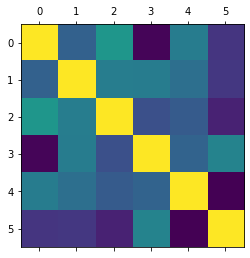

In [64]:
import matplotlib.pyplot as plt

plt.matshow(train_df.corr())

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
 3   Sex_male  891 non-null    uint8  
 4   Pclass_2  891 non-null    uint8  
 5   Pclass_3  891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(3)
memory usage: 23.6 KB


- 결측치를 평균값으로 채워줌

In [66]:
mean_age = np.mean(train_df['Age'])
train_df['Age'] = train_df['Age'].fillna(mean_age)

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
 3   Sex_male  891 non-null    uint8  
 4   Pclass_2  891 non-null    uint8  
 5   Pclass_3  891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(3)
memory usage: 23.6 KB


- 독립변수 / 종속변수 나눔

In [68]:
x = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']

- train, test 나눔

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [70]:
x_train.shape, y_train.shape

((668, 5), (668,))

In [71]:
x_test.shape, y_test.shape

((223, 5), (223,))

- multiple linear regression (logistic)

In [72]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression()

In [73]:
reg.score(x_test, y_test)  ## R-square

0.7847533632286996

In [75]:
mean_squared_error(y_test, reg.predict(x_test))

0.21524663677130046

In [146]:
accuracy_score(y_test, pred_lasso_5)

0.7757847533632287

In [110]:
confusion_matrix(y_test, reg.predict(x_test))

# 실제 1을 1로 예측: 112개
# 실제 1을 0으로 예측: 22개

# 실제 0을 0으로 예측: 63개
# 실제 0을 1로 예측: 26개

array([[112,  22],
       [ 26,  63]], dtype=int64)

In [112]:
reg.predict(x_test)

## sklearn 내부적으로 cutoff 통해 0~1사이의 값을 
## 0~0.5는 0으로, 0.5~1은 1로 바꿔줌

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

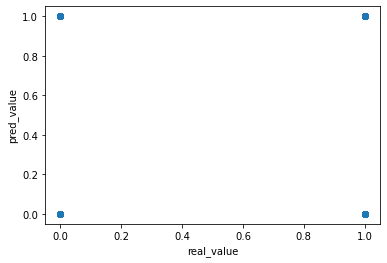

In [105]:
plt.scatter(y_test,reg.predict(x_test))
plt.xlabel("real_value")
plt.ylabel("pred_value")
plt.show()

## sklearn의 logistic_regression에서는 cut_off를 default로 0.5로 지정해놓음
## 0 또는 1밖에 표시가 안됨

- sklearn의 logistic regression에서 cutoff 지정 전... 즉, 연속적인 수로 결과값 그래프 그리기
     - predict() 대신 predict_proba() 이용

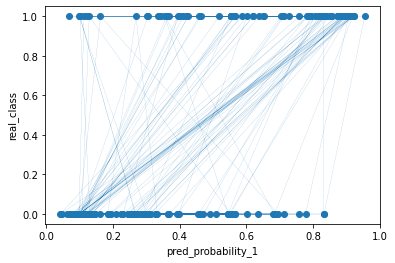

In [106]:
[data[0] for data in reg.predict_proba(x_test)]

plt.scatter([data[1] for data in reg.predict_proba(x_test)], y_test)
plt.plot([data[1] for data in reg.predict_proba(x_test)], y_test, linewidth=0.1)
plt.xlabel("pred_probability_1")
plt.ylabel("real_class")
plt.show()

## class=1일 확률이 0.5보다 작게 예측하면 실제값도 0인 경우가 대부분이고
## class=1일 확률이 0.5보다 크게 예측하면 실제값도 1인 경우가 대부분이고
## 이때의 정확도는 위에서 구했다시피 0.78로, 높은수준이다

- 성능 평가 함수 만들기
  

In [382]:
def scoring(y, pred):
    
    print("MSE:", mean_squared_error(y, pred),'\n')
    print("Accuracy: ", accuracy_score(y, pred),'\n')
    print('F1 Measure: ', f1_score(y,pred), '\n')
    print("confusion matrix")
    print(confusion_matrix(y, pred))
    
def scoring_roc(y, pred):
    
    fpr, tpr, thresholds = roc_curve(y, pred, pos_label=1)
    plt.plot(fpr,tpr)
    auc = np.trapz(tpr,fpr)
    print('AUC:', auc)

- Lasso classification
    - Lasso만 하면 regression 되므로 cutoff 정해서 0과 1로 바꿔줘야함

In [383]:
from sklearn.linear_model import Lasso

## alpha값을 너무 높이면 더 많은 변수가 0이 되고, 예측력이 떨어질 수 있으니 적당한 값을 넣어야 한다
reg = Lasso(alpha = 0.005)
reg.fit(x_train, y_train)

Lasso(alpha=0.005)

In [384]:
reg.coef_

array([-0.00354753,  0.00080377, -0.47870188, -0.00878255, -0.22382783])

In [385]:
reg.predict(x_test)[:30]

array([0.10391301, 0.31052883, 0.13243663, 0.89600375, 0.63508954,
       0.87068872, 0.57658997, 0.15472474, 0.62518796, 0.85326976,
       0.33226692, 0.04739646, 0.59083016, 0.09639873, 0.29480063,
       0.87445518, 0.31409059, 0.57665363, 0.32672837, 0.2959075 ,
       0.11822306, 0.32156935, 0.61462913, 0.13348154, 0.10331356,
       0.18396725, 0.30122525, 0.31253826, 0.20525241, 0.57205881])

In [386]:
# 0.5 이상이면 1로, 아니면 0으로 판단함.
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

In [387]:
pred_lasso_5 = cut_off(reg.predict(x_test), 0.5)
pred_lasso_5

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0])

In [388]:
scoring(y_test, pred_lasso_5)

MSE: 0.2242152466367713 

Accuracy:  0.7757847533632287 

F1 Measure:  0.7126436781609194 

confusion matrix
[[111  23]
 [ 27  62]]


AUC: 0.8623176253563645


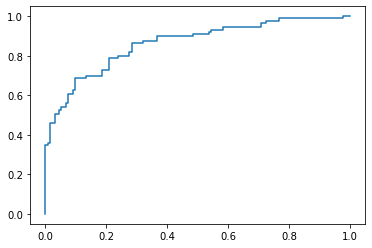

In [389]:
scoring_roc(y_test, reg.predict(x_test))

- cutoff 바꿔가면서 성능 측정해보기
    - 실험 결과, cutoff=0.6 일때 가장 성능이 좋다

In [390]:
cutoffs = np.arange(0.3,0.8,0.1)
cutoffs

array([0.3, 0.4, 0.5, 0.6, 0.7])

In [391]:
pred_lasso_cutoffs = [cut_off(reg.predict(x_test), i) for i in cutoffs]

for idx, pred in enumerate(pred_lasso_cutoffs):
    print("-----------------")
    print("cut_off = ",cutoffs[idx])
    print(scoring(y_test, pred))


-----------------
cut_off =  0.3
MSE: 0.2556053811659193 

Accuracy:  0.7443946188340808 

F1 Measure:  0.7323943661971831 

confusion matrix
[[88 46]
 [11 78]]
None
-----------------
cut_off =  0.4
MSE: 0.21973094170403587 

Accuracy:  0.7802690582959642 

F1 Measure:  0.7262569832402235 

confusion matrix
[[109  25]
 [ 24  65]]
None
-----------------
cut_off =  0.5
MSE: 0.2242152466367713 

Accuracy:  0.7757847533632287 

F1 Measure:  0.7126436781609194 

confusion matrix
[[111  23]
 [ 27  62]]
None
-----------------
cut_off =  0.6000000000000001
MSE: 0.20179372197309417 

Accuracy:  0.7982062780269058 

F1 Measure:  0.7058823529411764 

confusion matrix
[[124  10]
 [ 35  54]]
None
-----------------
cut_off =  0.7000000000000002
MSE: 0.21524663677130046 

Accuracy:  0.7847533632286996 

F1 Measure:  0.6521739130434783 

confusion matrix
[[130   4]
 [ 44  45]]
None


- ridge classification

In [392]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.005)
reg.fit(x_train, y_train)

Ridge(alpha=0.005)

In [393]:
reg.coef_

array([-4.27755245e-03,  3.38799764e-04, -5.00091827e-01, -1.11816996e-01,
       -3.15834740e-01])

In [394]:
pred_ridge_5 = cut_off(reg.predict(x_test), 0.5)

scoring(y_test, pred_ridge_5)


MSE: 0.21973094170403587 

Accuracy:  0.7802690582959642 

F1 Measure:  0.7199999999999999 

confusion matrix
[[111  23]
 [ 26  63]]


AUC: 0.8683548549387893


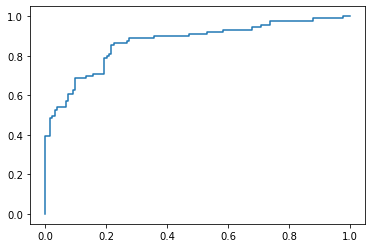

In [395]:
scoring_roc(y_test, reg.predict(x_test))

- elastic_net classification

In [396]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet(alpha=0.005)
reg.fit(x_train, y_train)

ElasticNet(alpha=0.005)

In [397]:
reg.coef_

array([-0.0038673 ,  0.00061453, -0.48401861, -0.05325071, -0.26229214])

In [398]:
pred_elastic_5 = cut_off(reg.predict(x_test), 0.5)
scoring(y_test, pred_elastic_5)

MSE: 0.2242152466367713 

Accuracy:  0.7757847533632287 

F1 Measure:  0.7126436781609194 

confusion matrix
[[111  23]
 [ 27  62]]


AUC: 0.7624937112191851


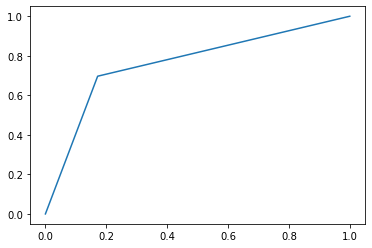

In [399]:
scoring_roc(y_test, pred_elastic_5)

# 0,1 범주 자체로 한것...

AUC: 0.866761697132316


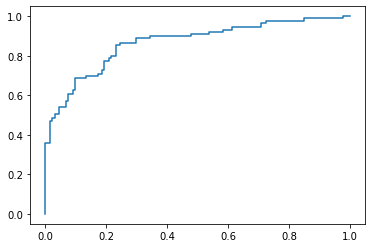

In [400]:
scoring_roc(y_test, reg.predict(x_test))

- PCA

In [401]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(x)

PCA(n_components=5)

In [402]:
pca.components_
# eigen vector

array([[ 2.56949338e-02,  9.99659205e-01, -1.74687834e-03,
        -9.64858383e-04, -4.15465876e-03],
       [ 9.99618516e-01, -2.57253260e-02,  3.78857078e-03,
         5.80003356e-04, -9.29200231e-03],
       [-6.01371555e-03, -2.71028222e-03, -2.86484087e-01,
         6.35952525e-01, -7.16552680e-01],
       [ 5.66965100e-03, -1.13369622e-03, -9.58059126e-01,
        -1.94583396e-01,  2.10301172e-01],
       [ 5.85525697e-03,  3.32416250e-03, -5.67225535e-03,
         7.46793426e-01,  6.64997798e-01]])

In [403]:
pca.explained_variance_
# eigen value

array([2.47100989e+03, 1.67548756e+02, 3.07903022e-01, 2.10547635e-01,
       5.23432669e-02])

- eigen value 보니까 차원 2개로 축소해주면 좋을듯

In [404]:
pcScore = pca.transform(x)[:,0:2]
pcScore[:5]

array([[-25.14581356,  -7.05718155],
       [ 39.28268471,   7.29494062],
       [-24.36651698,  -3.07986065],
       [ 21.02849668,   4.76385639],
       [-24.01205206,   5.91727889]])

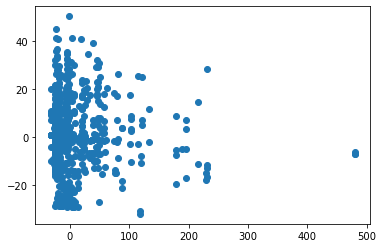

In [405]:
plt.scatter(pcScore[:,0],pcScore[:,1])
plt.show()

- PCA 결과 나온 데이터를 logistic regression으로 돌려보자
    - 변수 안그래도 몇개 없는데 확 줄이니까 당연히 성능 나빠짐
   

In [406]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(pcScore, y, test_size=0.25, random_state=42)

In [407]:
pca_logi_reg = LogisticRegression()
pca_logi_reg.fit(x_train_pca, y_train)

LogisticRegression()

In [408]:
scoring(y_test, pca_logi_reg.predict(x_test_pca))

MSE: 0.336322869955157 

Accuracy:  0.6636771300448431 

F1 Measure:  0.3589743589743589 

confusion matrix
[[127   7]
 [ 68  21]]


AUC: 0.7603555257420762


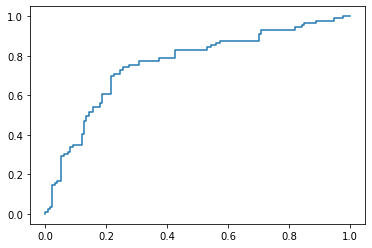

In [409]:
scoring_roc(y_test, np.array([i[1] for i in pca_logi_reg.predict_proba(x_test_pca)]))

- KNN

In [410]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=38, weights='distance') ## 거리에 반비례하는 가중치
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=38, weights='distance')

In [411]:
scoring(y_test, clf.predict(x_test))

MSE: 0.2825112107623318 

Accuracy:  0.7174887892376681 

F1 Measure:  0.588235294117647 

confusion matrix
[[115  19]
 [ 44  45]]


- KNN.... 가장 좋은 k 찾기
    - k=37, 38정도일 때 가장 좋음

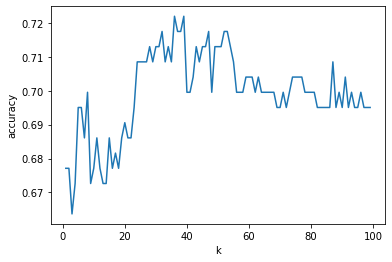

In [412]:
k_scores = []
k_range = range(1,100)
for i in k_range:
    clf = neighbors.KNeighborsClassifier(n_neighbors=i, weights='distance') ## 거리에 반비례하는 가중치
    clf.fit(x_train, y_train)
    k_scores.append(accuracy_score(y_test, clf.predict(x_test)))
    
plt.plot(k_range, k_scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

- KNN with k-fold cross validation

In [413]:
from sklearn.model_selection import cross_val_score

In [414]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
scores = cross_val_score(clf, x_test, y_test, scoring='accuracy') ## 여기서 바로 fitting
scores.mean()

0.7714141414141414

- LDA

In [415]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [416]:
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [417]:
scoring(y_test, clf.predict(x_test))

MSE: 0.21973094170403587 

Accuracy:  0.7802690582959642 

F1 Measure:  0.7199999999999999 

confusion matrix
[[111  23]
 [ 26  63]]


AUC: 0.8683548549387893


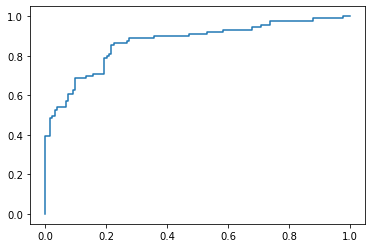

In [418]:
scoring_roc(y_test, np.array([i[1] for i in clf.predict_proba(x_test)]))

- QDA

In [419]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

In [420]:
scoring(y_test, clf.predict(x_test))

MSE: 0.21973094170403587 

Accuracy:  0.7802690582959642 

F1 Measure:  0.6754966887417219 

confusion matrix
[[123  11]
 [ 38  51]]


In [421]:
clf.predict_proba(x_test)[:10]

array([[0.9741631 , 0.0258369 ],
       [0.9316019 , 0.0683981 ],
       [0.95912236, 0.04087764],
       [0.02319483, 0.97680517],
       [0.5414873 , 0.4585127 ],
       [0.02994364, 0.97005636],
       [0.56853153, 0.43146847],
       [0.9509181 , 0.0490819 ],
       [0.53521288, 0.46478712],
       [0.00935259, 0.99064741]])

AUC: 0.8452121415394935


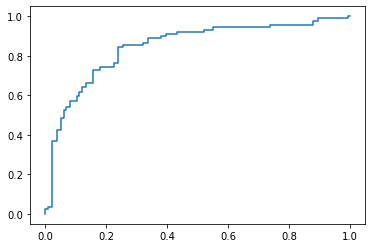

In [422]:
scoring_roc(y_test, np.array([i[1] for i in clf.predict_proba(x_test)]))

SVM

In [423]:
from sklearn import svm


In [424]:
linear_svm = svm.LinearSVC() # linear -> 커널 사용안함
poly_svm = svm.SVC(kernel='poly', gamma='scale')  # gamma=scale이 default
rbf_svm = svm.SVC(kernel='rbf') ## kernel='rbf'가 default
sigmoid_svm = svm.SVC(kernel='sigmoid')

linear_svm.fit(x_train, y_train)
poly_svm.fit(x_train, y_train)
rbf_svm.fit(x_train, y_train)
sigmoid_svm.fit(x_train, y_train)

C:\Users\Jang\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVC(kernel='sigmoid')

In [425]:
scoring(y_test, linear_svm.predict(x_test))

MSE: 0.21973094170403587 

Accuracy:  0.7802690582959642 

F1 Measure:  0.6918238993710691 

confusion matrix
[[119  15]
 [ 34  55]]


In [426]:
scoring(y_test, poly_svm.predict(x_test))

MSE: 0.3811659192825112 

Accuracy:  0.6188340807174888 

F1 Measure:  0.15841584158415842 

confusion matrix
[[130   4]
 [ 81   8]]


In [427]:
scoring(y_test, rbf_svm.predict(x_test))

MSE: 0.34080717488789236 

Accuracy:  0.6591928251121076 

F1 Measure:  0.36666666666666664 

confusion matrix
[[125   9]
 [ 67  22]]


In [428]:
scoring(y_test, sigmoid_svm.predict(x_test))

MSE: 0.40358744394618834 

Accuracy:  0.5964125560538116 

F1 Measure:  0.4943820224719101 

confusion matrix
[[89 45]
 [45 44]]


- decision tree

In [429]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='gini')
clf2 = tree.DecisionTreeClassifier(criterion='entropy')

clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [430]:
scoring(y_test, clf.predict(x_test))

MSE: 0.242152466367713 

Accuracy:  0.757847533632287 

F1 Measure:  0.6823529411764707 

confusion matrix
[[111  23]
 [ 31  58]]


In [431]:
scoring(y_test, clf2.predict(x_test))

MSE: 0.25112107623318386 

Accuracy:  0.7488789237668162 

F1 Measure:  0.6744186046511629 

confusion matrix
[[109  25]
 [ 31  58]]


- neural network

In [432]:
from sklearn.neural_network import MLPClassifier 

clf = MLPClassifier(solver='adam', activation='relu', learning_rate='constant', alpha=0.0001) ## 전부 default
clf.fit(x_train, y_train)

MLPClassifier()

In [433]:
scoring(y_test, clf.predict(x_test))

MSE: 0.22869955156950672 

Accuracy:  0.7713004484304933 

F1 Measure:  0.718232044198895 

confusion matrix
[[107  27]
 [ 24  65]]


- bagging

In [445]:
from sklearn.ensemble import BaggingClassifier

In [446]:
bagging_logistic_regression = BaggingClassifier(base_estimator = LogisticRegression(), n_estimators=10, verbose=1)
bagging_lda = BaggingClassifier(base_estimator = LinearDiscriminantAnalysis(), n_estimators=10, verbose=1)

bagging_logistic_regression.fit(x_train, y_train)
bagging_lda.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(), verbose=1)

In [447]:
scoring(y_test, bagging_logistic_regression.predict(x_test))

MSE: 0.21524663677130046 

Accuracy:  0.7847533632286996 

F1 Measure:  0.7241379310344828 

confusion matrix
[[112  22]
 [ 26  63]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [448]:
scoring(y_test, bagging_lda.predict(x_test))

MSE: 0.21076233183856502 

Accuracy:  0.7892376681614349 

F1 Measure:  0.7283236994219654 

confusion matrix
[[113  21]
 [ 26  63]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


- Adaboost

In [450]:
from sklearn.ensemble import AdaBoostClassifier

ada_lr = AdaBoostClassifier(base_estimator= LogisticRegression(), n_estimators=20, random_state=0)
ada_lr.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=20,
                   random_state=0)

In [451]:
scoring(y_test, ada_lr.predict(x_test))

MSE: 0.21076233183856502 

Accuracy:  0.7892376681614349 

F1 Measure:  0.7080745341614907 

confusion matrix
[[119  15]
 [ 32  57]]


- XGBoost

In [453]:
import xgboost as xgb

xgb_dtrain = xgb.DMatrix(data=x_train, label=y_train)
xgb_dtest = xgb.DMatrix(data=x_test)

xgb_param = {'max_depth': 10, # 트리 깊이
             'learning_rate': 0.01, # Step Size
             'n_estimators': 100, # Number of trees, 트리 생성 개수
             'objective': 'multi:softmax', # 목적 함수
             'num_class': len(set(y_train)) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
xgb_model = xgb.train(params = xgb_param, dtrain = xgb_dtrain)

[21:52:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [457]:
scoring(y_test, xgb_model.predict(xgb_test)) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측

MSE: 0.17937219730941703 

Accuracy:  0.820627802690583 

F1 Measure:  0.761904761904762 

confusion matrix
[[119  15]
 [ 25  64]]


- LightGBM

In [491]:
import lightgbm as lgb

lgb_dtrain = lgb.Dataset(data=x_train, label=y_train)
lgb_param = {'max_depth': 1, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 100, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(y_train)) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 174
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 5
[LightGBM] [Info] Start training from score -0.476010
[LightGBM] [Info] Start training from score -0.970899
[LightGBM] [Info] Start training from score -34.538776


C:\Users\Jang\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [492]:
np.argmax(lgb_model.predict(x_test), axis = 1)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [493]:
scoring(y_test, np.argmax(lgb_model.predict(x_test), axis = 1))

MSE: 0.21524663677130046 

Accuracy:  0.7847533632286996 

F1 Measure:  0.7241379310344828 

confusion matrix
[[112  22]
 [ 26  63]]


- Ensemble in Ensemble (XGBoost)

In [543]:
bagging_predict_result = [] # 빈 리스트 생성
for _ in range(50):
    
#     data_index = [data_index for data_index in range(x_train.shape[0])]
    # (0 ~  x_train.shape[0])의 데이터중 랜덤으로 x_train.shape[0]개 뽑음
    random_data_index = np.random.choice(x_train.shape[0], x_train.shape[0])
    print(_, "번째 복원추출시 unique한 데이터 수: ", len(set(random_data_index)))
    xgb_dtrain = xgb.DMatrix(data=x_train.iloc[random_data_index], label=y_train.iloc[random_data_index])
    xgb_dtest = xgb.DMatrix(data=x_test)

    xgb_param = {'max_depth': 10, # 트리 깊이
                 'learning_rate': 0.01, # Step Size
                 'n_estimators': 100, # Number of trees, 트리 생성 개수
                 'objective': 'multi:softmax', # 목적 함수
                 'num_class': len(set(y_train)) + 1,  # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
                 'verbosity': 0}  ## warning 끄기
    xgb_model = xgb.train(params = xgb_param, dtrain = xgb_dtrain)
    
    predict = xgb_model.predict(xgb_dtest)
    bagging_predict_result.append(predict)
    print(_, "번째 모델의 MSE: ", mean_squared_error(y_test, predict), '\n')
    

0 번째 복원추출시 unique한 데이터 수:  419
0 번째 모델의 MSE:  0.19730941704035873 

1 번째 복원추출시 unique한 데이터 수:  429
1 번째 모델의 MSE:  0.2062780269058296 

2 번째 복원추출시 unique한 데이터 수:  427
2 번째 모델의 MSE:  0.21524663677130046 

3 번째 복원추출시 unique한 데이터 수:  421
3 번째 모델의 MSE:  0.2062780269058296 

4 번째 복원추출시 unique한 데이터 수:  424
4 번째 모델의 MSE:  0.18834080717488788 

5 번째 복원추출시 unique한 데이터 수:  427
5 번째 모델의 MSE:  0.17937219730941703 

6 번째 복원추출시 unique한 데이터 수:  420
6 번째 모델의 MSE:  0.19730941704035873 

7 번째 복원추출시 unique한 데이터 수:  431
7 번째 모델의 MSE:  0.19282511210762332 

8 번째 복원추출시 unique한 데이터 수:  432
8 번째 모델의 MSE:  0.19282511210762332 

9 번째 복원추출시 unique한 데이터 수:  429
9 번째 모델의 MSE:  0.17488789237668162 

10 번째 복원추출시 unique한 데이터 수:  421
10 번째 모델의 MSE:  0.17488789237668162 

11 번째 복원추출시 unique한 데이터 수:  428
11 번째 모델의 MSE:  0.2242152466367713 

12 번째 복원추출시 unique한 데이터 수:  417
12 번째 모델의 MSE:  0.17488789237668162 

13 번째 복원추출시 unique한 데이터 수:  435
13 번째 모델의 MSE:  0.16591928251121077 

14 번째 복원추출시 unique한 데이터 수:  427
14 번째 모델의 M

In [544]:
bagging_predict_result
final_pred = []
for i in range(x_test.shape[0]):
    tmp_pred = []
    for j in range(len(bagging_predict_result)):
        tmp_pred.append(bagging_predict_result[j][i])
    final_pred.append(np.mean(tmp_pred))

c_off = np.arange(0.3,0.8,0.1)  ## array([0.3, 0.4, 0.5, 0.6, 0.7])

for i in c_off:
    print("-------------------")
    print("cut off: ", i)
    scoring(y_test, cut_off(np.array(final_pred), i))

-------------------
cut off:  0.3
MSE: 0.16143497757847533 

Accuracy:  0.8385650224215246 

F1 Measure:  0.793103448275862 

confusion matrix
[[118  16]
 [ 20  69]]
-------------------
cut off:  0.4
MSE: 0.16143497757847533 

Accuracy:  0.8385650224215246 

F1 Measure:  0.7906976744186045 

confusion matrix
[[119  15]
 [ 21  68]]
-------------------
cut off:  0.5
MSE: 0.17937219730941703 

Accuracy:  0.820627802690583 

F1 Measure:  0.7590361445783134 

confusion matrix
[[120  14]
 [ 26  63]]
-------------------
cut off:  0.6000000000000001
MSE: 0.18834080717488788 

Accuracy:  0.8116591928251121 

F1 Measure:  0.7341772151898734 

confusion matrix
[[123  11]
 [ 31  58]]
-------------------
cut off:  0.7000000000000002
MSE: 0.19282511210762332 

Accuracy:  0.8071748878923767 

F1 Measure:  0.7225806451612904 

confusion matrix
[[124  10]
 [ 33  56]]


- XGboost로 앙상블 한 결과, bagging 50번 반복하고, cutoff = 0.4로 했을 때
- accuracy = 약 0.84, F1-measure = 약 0.79로, 성능이 가장 좋았다

- 1등 : XGboost로 앙상블
- 2등 : XGboost
- 그 뒤로는 거의 비슷
- SVM, KNN, PCA 한 결과는 매우 안좋음

- 자료해석을 위해 클러스터링도 해보자